In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
fanv3Input = {'manure':37.5, 'fertilizer':82.6, 'fixation':12.2, 'deposition':18.8}
fanv3Output = {'$NH_3$':24.8, 'NO':5.2, '$N_2O$':7.1, '$N_2$':42.8, 'runoff':31.8, 'harvest':30.8, 'fire':3.1}
clmInput = {'manure':29.1, 'fertilizer':82.6, 'fixation':11.5, 'deposition':18.7}
clmOutput = {'$NH_3$':0, 'NO':6.1, '$N_2O$':7.9, '$N_2$':44.3, 'runoff':28.9, 'harvest':36.7, 'fire':3.4}

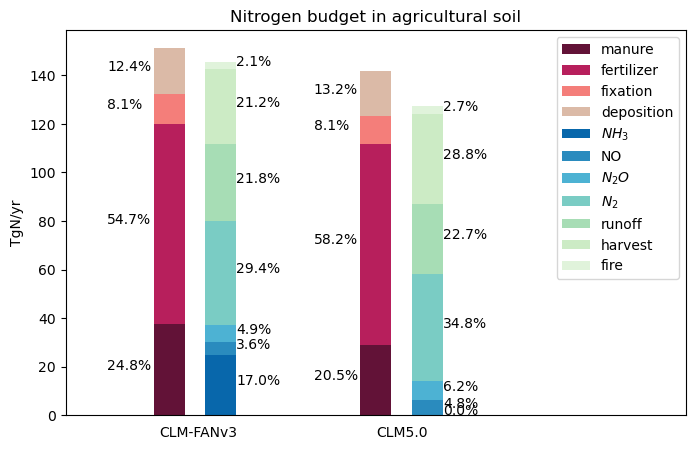

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#621237', '#b71f5c', '#f47e7a', '#dbbaa7']
palette = sns.color_palette(palette='GnBu', n_colors=7)
palette.reverse()
bottom = [0, 0]
for i, key in enumerate(fanv3Input.keys()):
    ax.bar([0.1, 0.3], [fanv3Input.get(key), clmInput.get(key)], width=0.03, bottom=bottom, label=key, color=colors[i])

    yp = (bottom[0]*2+fanv3Input.get(key))/2
    per = round(fanv3Input.get(key)*100/sum(fanv3Input.values()), 1)
    ax.text(x=0.1-0.06, y=yp, s=str(per)+'%')

    yp = (bottom[1]*2+clmInput.get(key))/2
    per = round(clmInput.get(key)*100/sum(clmInput.values()), 1)   
    ax.text(x=0.3-0.06, y=yp, s=str(per)+'%')
    bottom[0] = bottom[0] + fanv3Input.get(key)
    bottom[1] = bottom[1] + clmInput.get(key)

bottom = [0, 0]
for i, key in enumerate(fanv3Output.keys()):
    ax.bar([0.15, 0.35], [fanv3Output.get(key), clmOutput.get(key)], width=0.03, bottom=bottom, label=key, color=palette[i])
    yp = (bottom[0]*2+fanv3Output.get(key))/2
    per = round(fanv3Output.get(key)*100/sum(fanv3Output.values()), 1)
    ax.text(x=0.15+0.015, y=yp, s=str(per)+'%')

    yp = (bottom[1]*2+clmOutput.get(key))/2
    per = round(clmOutput.get(key)*100/sum(clmOutput.values()), 1)   
    ax.text(x=0.35+0.015, y=yp, s=str(per)+'%')

    bottom[0] = bottom[0] + fanv3Output.get(key)
    bottom[1] = bottom[1] + clmOutput.get(key)

ax.set_xlim(0, 0.6)
ax.set_xticks([])
ax.text(x=0.09, y=-9, s='CLM-FANv3')
ax.text(x=0.3, y=-9, s='CLM5.0')
ax.set_ylabel("TgN/yr")
ax.set_title("Nitrogen budget in agricultural soil")
ax.legend(loc='upper right')
fig.savefig('graphs/NitrogenBudget.svg', dpi=300)
plt.show()

In [5]:
a = xr.open_dataset("/glade/work/jinmuluo/MESONET/surfdata_0.9x1.25_hist_78pfts_CMIP6_simyr2000_isu_point_webster_c230824.nc")